# FAKE NEWS DETECTOR
### Fake News Detector using Logistic Regression model.

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In Machine Learning, stopwords are common words that are filtered out and excluded from the text processing pipeline during natural language processing (NLP) tasks. These words are typically very frequent and contribute little to the overall meaning of a document or sentence. Removing stopwords is a preprocessing step aimed at reducing the dimensionality of the text data and improving the efficiency and quality of NLP algorithms.

In [ ]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

< Pre-Processing the Data >

Importing the dataset into a dataframe, and handling missing values.

In [ ]:
news_dataset = pd.read_csv('train.csv', on_bad_lines='skip', engine='python')


In [ ]:
news_dataset.head()
news_dataset.shape

(10493, 5)

In [ ]:
# the number of missing values in the dataset
news_dataset.isnull().sum()

,0
id,0
title,285
author,1001
text,22
label,0


In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
10488    Susan Chira Sexist Political Criticism Finds a...
10489    Starkman President Elect Trump: What Can The U...
10490    Parul Sehgal A Great Indian Novel Reaches Amer...
10491    Brett Cole Fecal Pollution Taints Water at Mel...
10492    EV DAPL Guards Who Attacked Natives with Dogs ...
Name: content, Length: 10493, dtype: object


In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
10488  10488  Sexist Political Criticism Finds a New Target:...   
10489  10489  President Elect Trump: What Can The US And The...   
10490  10490  A Great Indian Novel Reaches American Shores -...   
10491  10491  Fecal Pollution Taints Water at Melbourne’s Be...   
10492  10492  DAPL Guards Who Attacked Natives with Dogs Wer...   

                   author                                               text  \
0           Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
1         Daniel J. Flynn  Ever get

< Stemming Process >

Stemming is a natural language processing (NLP) technique used in Machine Learning to reduce words to their root or base form, called the "stem." The purpose of stemming is to normalize words with the same root, even if they have different endings or suffixes, so that they can be treated as the same word during text processing and analysis.

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
10488    susan chira sexist polit critic find new targe...
10489          starkman presid elect trump us world expect
10490    parul sehgal great indian novel reach american...
10491    brett cole fecal pollut taint water melbourn b...
10492     ev dapl guard attack nativ dog licens work secur
Name: content, Length: 10493, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)
X.shape
print(Y)
Y.shape

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'parul sehgal great indian novel reach american shore new york time'
 'brett cole fecal pollut taint water melbourn beach storm new york time'
 'ev dapl guard attack nativ dog licens work secur']
[1 0 1 ... 0 0 1]


(10493,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 106354 stored elements and shape (10493, 12635)>
  Coords	Values
  (0, 213)	0.2736304117494114
  (0, 1861)	0.3661880013702649
  (0, 2212)	0.2485872702890072
  (0, 2697)	0.35374578829411996
  (0, 2840)	0.2719667499917379
  (0, 3715)	0.2384636591390877
  (0, 5219)	0.22499938216988072
  (0, 5721)	0.24811458937730904
  (0, 6414)	0.2899130188641785
  (0, 6616)	0.35374578829411996
  (0, 9967)	0.2618289492508367
  (0, 11620)	0.2886946320152021
  (1, 1144)	0.28701653372986546
  (1, 1437)	0.1522332049048439
  (1, 1673)	0.38517197102911677
  (1, 2101)	0.1882948229300854
  (1, 2673)	0.26379985108414467
  (1, 4122)	0.7197227655751075
  (1, 5093)	0.18760074850241346
  (1, 12398)	0.29639317050769287
  (2, 2198)	0.3202218740260081
  (2, 2327)	0.45653713589519657
  (2, 4039)	0.3885301016274333
  (2, 4464)	0.34576511741577043
  (2, 7131)	0.4881597054702504
  :	:
  (10490, 9980)	0.42400955204987517
  (10490, 10185)	0.3932841601070426
  (10490

< Splitting training and testing data >

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

< Training the model >

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

< Model Accuracy >

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy of Training data : ', training_data_accuracy)

Accuracy of Training data :  0.9797474386466524


In [ ]:
# accuracy score on the testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy of Test data : ', test_data_accuracy)

Accuracy of Test data :  0.9647451167222487


< Prediction >

0 = Real News <br>
1 = Fake News

In [ ]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
res = Y_test[3]

if (res == 0):
    print('The news is Real - 0')
else:
    print('The news is Fake - 1')

The news is Fake - 1


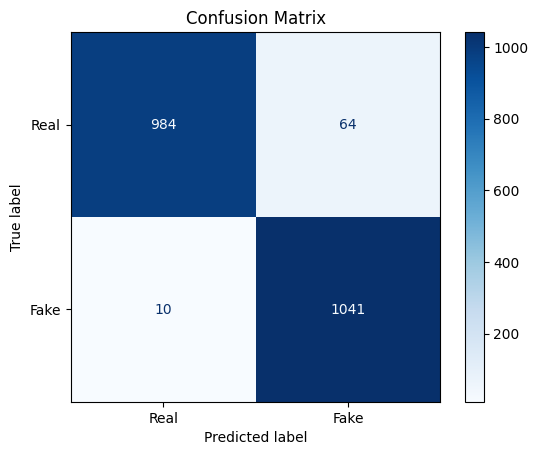

Classification Report:

              precision    recall  f1-score   support

        Real       0.99      0.94      0.96      1048
        Fake       0.94      0.99      0.97      1051

    accuracy                           0.96      2099
   macro avg       0.97      0.96      0.96      2099
weighted avg       0.97      0.96      0.96      2099



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
Y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred, target_names=["Real", "Fake"]))


In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, Y_train)

Y_pred_svm = svm_model.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print("\nSVM Classification Report:\n")
print(classification_report(Y_test, Y_pred_svm, target_names=["Real", "Fake"]))


SVM Test Accuracy: 0.9895188184849929

SVM Classification Report:

              precision    recall  f1-score   support

        Real       0.99      0.98      0.99      1048
        Fake       0.98      0.99      0.99      1051

    accuracy                           0.99      2099
   macro avg       0.99      0.99      0.99      2099
weighted avg       0.99      0.99      0.99      2099



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nRandom Forest Classification Report:\n")
print(classification_report(Y_test, Y_pred_rf, target_names=["Real", "Fake"]))


Random Forest Test Accuracy: 0.9928537398761315

Random Forest Classification Report:

              precision    recall  f1-score   support

        Real       1.00      0.99      0.99      1048
        Fake       0.99      1.00      0.99      1051

    accuracy                           0.99      2099
   macro avg       0.99      0.99      0.99      2099
weighted avg       0.99      0.99      0.99      2099

